In [1]:
import tensorflow as tf
import keras
print("TensorFlow version: %s" % tf.__version__)
print("Keras version: %s" % keras.__version__)

Using TensorFlow backend.


TensorFlow version: 1.1.0
Keras version: 2.0.5


## 3.7.1 The Reuters dataset

### Listing 3.60 Loading the Reuters dataset

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### Listing 3.61 Taking a look at the data

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

### Listing 3.62 Taking a look at the data

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### Listing 3.63 Decoding a newswires back to text

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
train_labels[10]

3

## 3.7.2 Preparing the data

### Listing 3.65 Encoding the data

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
# our vectorized test data
x_test = vectorize_sequences(test_data)

### Listing 3.66 One-hot encoding the labels

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

### Listing 3.67 One-hot encoding the labels, the Keras way

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3.7.3 Building our network

### Listing 3.68 Our model definition

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Listing 3.69 Compiling our model

In [13]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## 3.7.4 Validating our approach

### Listing 3.70 Setting aside a validation set

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Listing 3.71 Training our model

In [15]:
history = model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5282 - acc: 0.4907 - val_loss: 1.7156 - val_acc: 0.6190
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4391 - acc: 0.6934 - val_loss: 1.3379 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0876 - acc: 0.7652 - val_loss: 1.1626 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8650 - acc: 0.8171 - val_loss: 1.0785 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.6972 - acc: 0.8490 - val_loss: 0.9808 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5587 - acc: 0.8800 - val_loss: 0.9363 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4520 - acc: 0.9070 - val_loss: 0.9081 - val_acc: 0.8040
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3636 - a

### Listing 3.72 Plotting the training and validation loss

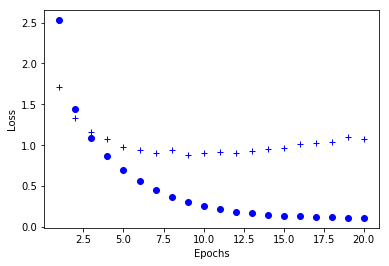

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### Listing 3.73 Plotting the training and validation accuracy

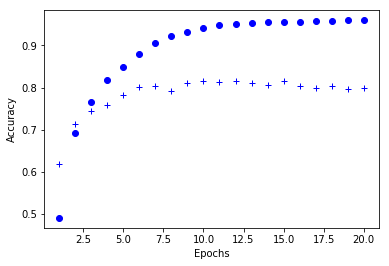

In [17]:
plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Listing 3.74 Re-training a model from scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(x_train,
            one_hot_train_labels,
            epochs=9,
            batch_size=512,
            validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 0s - loss: 2.4359 - acc: 0.5363 - val_loss: 1.6416 - val_acc: 0.6500
Epoch 2/9
8982/8982 [==============================] - 0s - loss: 1.3062 - acc: 0.7196 - val_loss: 1.2993 - val_acc: 0.7075
Epoch 3/9
8982/8982 [==============================] - 0s - loss: 0.9639 - acc: 0.7892 - val_loss: 1.1402 - val_acc: 0.7498
Epoch 4/9
8982/8982 [==============================] - 0s - loss: 0.7507 - acc: 0.8407 - val_loss: 1.0338 - val_acc: 0.7694
Epoch 5/9
8982/8982 [==============================] - 0s - loss: 0.5920 - acc: 0.8762 - val_loss: 0.9827 - val_acc: 0.7805
Epoch 6/9
8982/8982 [==============================] - 0s - loss: 0.4712 - acc: 0.9012 - val_loss: 0.9727 - val_acc: 0.7872
Epoch 7/9
8982/8982 [==============================] - 0s - loss: 0.3809 - acc: 0.9183 - val_loss: 0.9517 - val_acc: 0.7903
Epoch 8/9
8982/8982 [==============================] - 0s - loss: 0.3060 - acc: 0.93

In [19]:
results = model.evaluate(x_test, one_hot_test_labels)

1696/2246 [=====================>........] - ETA: 0s

### Listing 3.75 Our final results

In [20]:
results

[0.9762544121364346, 0.79207479969688743]

### Listing 3.76 Accuracy of a random baseline

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)


0.19723953695458593

## 3.7.5 Generating predictions on new data

### Listing 3.77 Generating predictions for new data

In [22]:
predictions = model.predict(x_test)

### Listing 3.78 Taking a look at our predictions

In [23]:
predictions[0].shape

(46,)

### Listing 3.79 Taking a look at our predictions

In [24]:
np.sum(predictions[0])

0.99999994

### Listing 3.80 Taking a look at our predictions

In [25]:
np.argmax(predictions[0])

3

## 3.7.6 A different way to handle the labels and the loss

### Listing 3.81 Encoding the labels as integer arrays

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

### Listing 3.82 Using the sparse_categorical_crossentropy loss

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

## 3.7.7 On the importance of having sufficiently large intermediate layers

### Listing 3.83 A model with an information bottleneck

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(x_train,
            one_hot_train_labels,
            epochs=10,
            batch_size=128,
            validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 0s - loss: 2.5643 - acc: 0.4127 - val_loss: 1.7309 - val_acc: 0.6438
Epoch 2/10
8982/8982 [==============================] - 0s - loss: 1.3710 - acc: 0.7002 - val_loss: 1.3398 - val_acc: 0.6946
Epoch 3/10
8982/8982 [==============================] - 0s - loss: 1.0455 - acc: 0.7576 - val_loss: 1.2364 - val_acc: 0.7137
Epoch 4/10
8982/8982 [==============================] - 0s - loss: 0.8556 - acc: 0.7935 - val_loss: 1.1263 - val_acc: 0.7413
Epoch 5/10
8982/8982 [==============================] - 0s - loss: 0.7072 - acc: 0.8367 - val_loss: 1.1216 - val_acc: 0.7418
Epoch 6/10
8982/8982 [==============================] - 0s - loss: 0.5885 - acc: 0.8667 - val_loss: 1.0766 - val_acc: 0.7587
Epoch 7/10
8982/8982 [==============================] - 0s - loss: 0.4928 - acc: 0.8904 - val_loss: 1.0942 - val_acc: 0.7600
Epoch 8/10
8982/8982 [==============================] - 0s - loss: 0.4194 - a